TASK - 1


In [1]:
import numpy as np

weights = {
    'w14': 0.1, 'w15': 0.2,
    'w24': 0.3, 'w25': 0.4,
    'w34': 0.5, 'w35': 0.6,
    'w46': 0.7, 'w56': 0.8
}
biases = {'b4': 0.1, 'b5': 0.2, 'b6': 0.3}

X = np.array([[0.5, 0.3, 0.2]])
Y = np.array([[1]])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

net_input_4 = np.dot(X, np.array([[weights['w14']], [weights['w24']], [weights['w34']]])) + biases['b4']
net_input_5 = np.dot(X, np.array([[weights['w15']], [weights['w25']], [weights['w35']]])) + biases['b5']

output_4 = sigmoid(net_input_4)
output_5 = sigmoid(net_input_5)

net_input_6 = np.dot(np.array([output_4, output_5]).T, np.array([[weights['w46']], [weights['w56']]])) + biases['b6']
output_6 = sigmoid(net_input_6)

error = Y - output_6

delta_6 = error * output_6 * (1 - output_6)

delta_4 = delta_6 * weights['w46'] * output_4 * (1 - output_4)
delta_5 = delta_6 * weights['w56'] * output_5 * (1 - output_5)

learning_rate = 0.1

weights['w46'] += learning_rate * delta_6 * output_4
weights['w56'] += learning_rate * delta_6 * output_5
biases['b6'] += learning_rate * delta_6

weights['w14'] += learning_rate * delta_4 * X[0, 0]
weights['w24'] += learning_rate * delta_4 * X[0, 1]
weights['w34'] += learning_rate * delta_4 * X[0, 2]
biases['b4'] += learning_rate * delta_4

weights['w15'] += learning_rate * delta_5 * X[0, 0]
weights['w25'] += learning_rate * delta_5 * X[0, 1]
weights['w35'] += learning_rate * delta_5 * X[0, 2]
biases['b5'] += learning_rate * delta_5

print("Updated weights:", weights)
print("Updated biases:", biases)


Updated weights: {'w14': array([[[0.10034356]]]), 'w15': array([[[0.20037601]]]), 'w24': array([[[0.30020614]]]), 'w25': array([[[0.40022561]]]), 'w34': array([[[0.50013742]]]), 'w35': array([[[0.60015041]]]), 'w46': array([[[0.70236071]]]), 'w56': array([[[0.80255315]]])}
Updated biases: {'b4': array([[[0.10068712]]]), 'b5': array([[[0.20075203]]]), 'b6': array([[[0.30404099]]])}


TASK - 2


X shape: (1000, 2), Y shape: (1000, 1)
Training with optimizer: SGD
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7313 - val_loss: 0.7014
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7037 - val_loss: 0.6835
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6852 - val_loss: 0.6690
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6689 - val_loss: 0.6569
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6670 - val_loss: 0.6457
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6548 - val_loss: 0.6345
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6413 - val_loss: 0.6234
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6444 - val_loss: 0.6126
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6328 - val_loss: 0.6020
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6098 - val_loss: 0.5916
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5986 - val_loss: 0.5810
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5779 - val_loss: 0.5707


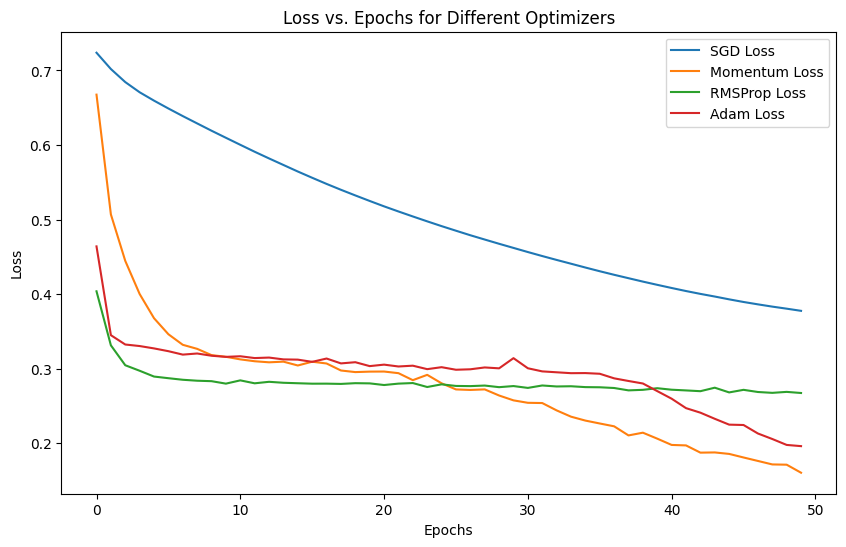

Evaluating model with optimizer: SGD
Final loss with SGD: 0.2604759633541107
Evaluating model with optimizer: Momentum
Final loss with Momentum: 0.2291993647813797
Evaluating model with optimizer: RMSProp
Final loss with RMSProp: 0.2256428748369217
Evaluating model with optimizer: Adam
Final loss with Adam: 0.2621574103832245


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

# Generate a planar dataset (e.g., moons dataset)
X, Y = make_moons(n_samples=1000, noise=0.2, random_state=42)
Y = Y.reshape(-1, 1)

# Print dataset shapes for debugging
print(f"X shape: {X.shape}, Y shape: {Y.shape}")

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define a function to create a model
def create_model():
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu'))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    return model

# Define a function to create new optimizer instances
def get_optimizer(name):
    if name == 'SGD':
        return SGD(learning_rate=0.01)
    elif name == 'Momentum':
        return SGD(learning_rate=0.01, momentum=0.9)
    elif name == 'RMSProp':
        return RMSprop(learning_rate=0.01)
    elif name == 'Adam':
        return Adam(learning_rate=0.01)
    else:
        raise ValueError(f"Unknown optimizer: {name}")

# List of optimizer names
optimizer_names = ['SGD', 'Momentum', 'RMSProp', 'Adam']

# Train the model with different optimizers and plot the results
plt.figure(figsize=(10, 6))
for name in optimizer_names:
    print(f"Training with optimizer: {name}")
    model = create_model()
    optimizer = get_optimizer(name)
    model.compile(optimizer=optimizer, loss='binary_crossentropy')

    history = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

    plt.plot(history.history['loss'], label=f'{name} Loss')

plt.title('Loss vs. Epochs for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the final model on the test set for each optimizer
for name in optimizer_names:
    print(f"Evaluating model with optimizer: {name}")
    model = create_model()
    optimizer = get_optimizer(name)
    model.compile(optimizer=optimizer, loss='binary_crossentropy')
    model.fit(X_train, Y_train, epochs=50, batch_size=10, verbose=0)

    loss = model.evaluate(X_test, Y_test, verbose=0)
    print(f'Final loss with {name}: {loss}')
